# Figure4

## Data manipulation for Calculating concentration of each lipid with different treatment

In [ ]:
# Load necessary libraries
library(readxl)
library(dplyr)
library(tidyr)
library(ggplot2)
library(viridis)  # For a colorblind-friendly palette
library(ggthemes) # For additional themes
library(extrafont) # For using custom fonts (you may need to install this)
library(readxl)
library(dplyr)
library(writexl)
library(tidyverse)
library(ggrepel)
library(scales)
library(gridExtra)


# Load the Excel file
file_path <- 'Fig5-ALL-concentration-updated.xlsx'
df <- read_excel(file_path, sheet = 'SIRIUS-STD')

# Sample data with combined treatment type
sample_data <- data.frame(
  Sample = c(19, 22, 36, 28, 44, 49, 35, 40, 52, 27, 43, 48, 50),
  Type1 = c("Ambient", "Ambient", "Ambient", "Ambient", "Ambient", "Ambient", "Future", "Future", "Future", "Future", "Future", "Future", "Future"),
  Type2 = c("No_drought", "No_drought", "No_drought", "Drought", "Drought", "Drought", "No_drought", "No_drought", "No_drought", "Drought", "Drought", "Drought", "Drought"),
  Weight = c(2.054, 1.965, 2.063, 2.048, 2.063, 2.082, 2.065, 2.032, 2.033, 2.071, 2.028, 2.027, 0.178)
)
sample_data$Combined_Treatment <- paste(sample_data$Type1, sample_data$Type2, sep = "_")

# Mapping sample numbers to treatment columns
sample_to_column <- list(
  `19` = 'Ambient_No_drought_Sample_19',
  `22` = 'Ambient_No_drought_Sample_22',
  `36` = 'Ambient_No_drought_Sample_36',
  `28` = 'Ambient_Drought_Sample_28',
  `44` = 'Ambient_Drought_Sample_44',
  `49` = 'Ambient_Drought_Sample_49',
  `35` = 'Future_No_drought_Sample_35',
  `40` = 'Future_No_drought_Sample_40',
  `52` = 'Future_No_drought_Sample_52',
  `27` = 'Future_Drought_Sample_27',
  `43` = 'Future_Drought_Sample_43',
  `48` = 'Future_Drought_Sample_48'
)

# Filter out rows where the corresponding LOQ column value is not 1 (good value)
concentration_cols <- grep('Concentration$', names(df), value = TRUE)
loq_cols <- grep('Concentration > LOQ$', names(df), value = TRUE)
for (loq_col in loq_cols) {
  df <- df %>% filter(df[[loq_col]] == 1)
}

# Creating a new dataframe to hold the rearranged columns
filtered_df <- df %>% select(GlobalID, `Molecule List`, LipidMolecule)

# Renaming the columns based on combined treatment type and sample number
for (i in 1:nrow(sample_data)) {
  sample <- sample_data$Sample[i]
  treatment_col <- paste(sample_data$Combined_Treatment[i], 'Sample', sample, sep = "_")
  sample_col <- paste(sample, 'Sum Total Area Concentration', sep = " ")
  if (sample_col %in% names(df)) {
    filtered_df[[treatment_col]] <- df[[sample_col]]
  }
}

# Creating the new dataframe with the desired format including GlobalID
new_format_data_with_id <- data.frame(
  GlobalID = integer(),
  Molecule.List = character(),
  LipidMolecule = character(),
  Sample = integer(),
  Concentration = numeric(),
  Treatment = character(),
  stringsAsFactors = FALSE
)

# Populating the new dataframe with GlobalID
for (i in 1:length(sample_to_column)) {
  sample <- as.numeric(names(sample_to_column)[i])
  column <- sample_to_column[[i]]
  treatment_type <- strsplit(column, '_Sample_')[[1]][1]
  for (j in 1:nrow(filtered_df)) {
    new_format_data_with_id <- rbind(new_format_data_with_id, data.frame(
      GlobalID = filtered_df$GlobalID[j],
      Molecule.List = filtered_df$`Molecule List`[j],
      LipidMolecule = filtered_df$LipidMolecule[j],
      Sample = sample,
      Concentration = filtered_df[[column]][j],
      Treatment = treatment_type
    ))
  }
}

output_path <- "information-theory-indices1.xlsx"
write_xlsx(new_format_data_with_id, output_path)

# Display the final dataframe
print(head(new_format_data_with_id))

  GlobalID Molecule.List            LipidMolecule Sample Concentration
1       10           Cer    Cer(d16:0_16:1)+O:(s)     19     0.2152289
2       13           Cer Cer(d18:1_24:1)+2O:(s)_A     19     0.1063906
3       16           Cer          Cer(d18:0_14:0)     19     0.5464841
4       17           Cer        Cer(d18:0_15:0)_A     19     0.1807421
5       25           Cer        Cer(d18:0_16:0)_B     19     1.0723055
6       26           Cer   Cer(d19:0_19:0)+2O:(s)     19     0.2034396
           Treatment
1 Ambient_No_drought
2 Ambient_No_drought
3 Ambient_No_drought
4 Ambient_No_drought
5 Ambient_No_drought
6 Ambient_No_drought

## Calculation of Shannon entropy Hj

# A tibble: 12 × 2
   Sample   H_j
    <dbl> <dbl>
 1     19  6.43
 2     22  6.33
 3     27  6.48
 4     28  6.45
 5     35  6.68
 6     36  6.98
 7     40  6.89
 8     43  6.37
 9     44  6.33
10     48  6.35
11     49  6.33
12     52  6.35

# A tibble: 6 × 2
  LipidMolecule    S_i
  <chr>          <dbl>
1 C18H35O16P    0.0950
2 C21H38O4      0.276 
3 C23H48O3      0.0755
4 C25H41O12P    0.0910
5 C25H49O12P    0.133 
6 C27H54NO7P    0.0665

# A tibble: 6 × 3
# Groups:   Sample [1]
  Sample LipidMolecule    S_ij
   <dbl> <chr>           <dbl>
1     19 C18H35O16P    -0.467 
2     19 C21H38O4       0.781 
3     19 C23H48O3      -0.514 
4     19 C25H41O12P    -0.0270
5     19 C25H49O12P    -0.252 
6     19 C27H54NO7P     0.290 

# A tibble: 12 × 2
   Sample delta_j
    <dbl>   <dbl>
 1     19   0.153
 2     22   0.226
 3     27   0.126
 4     28   0.244
 5     35   0.130
 6     36   0.145
 7     40   0.144
 8     43   0.140
 9     44   0.129
10     48   0.154
11     49   0.151
12     52   0.192

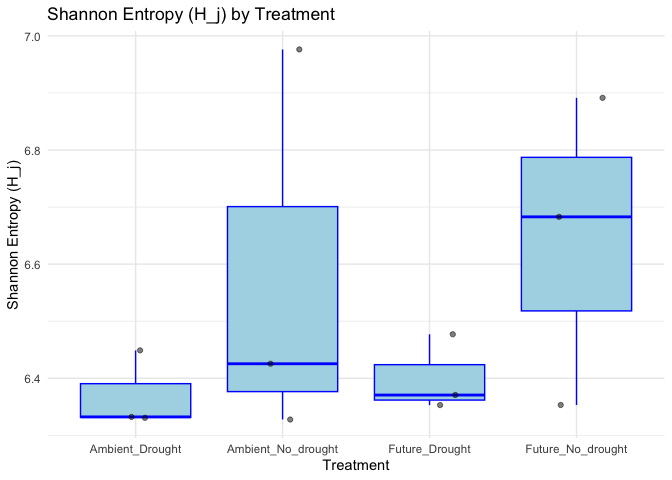

In [ ]:
# Load necessary libraries
library(readxl)
library(dplyr)
library(ggplot2)
library(viridis)

# Load the Excel file
file_path <- "information-theory-indices1.xlsx"
data <- read_excel(file_path, sheet = "Sheet1")

# Step 1: Calculate P_ij (relative frequency) for each molecule in each sample
data_grouped <- data %>%
  group_by(Sample) %>%
  mutate(P_ij = Concentration / sum(Concentration))

# Step 2: Calculate H_j (Shannon entropy) for each sample
H_j <- data_grouped %>%
  group_by(Sample) %>%
  summarize(H_j = -sum(P_ij * log2(P_ij), na.rm = TRUE))

# Step 3: Calculate P_i (average frequency) for each molecule
P_i <- data_grouped %>%
  group_by(LipidMolecule) %>%
  summarize(P_i = mean(P_ij))

# Step 4: Calculate S_i (specificity) for each molecule
S_i <- data_grouped %>%
  left_join(P_i, by = "LipidMolecule") %>%
  group_by(LipidMolecule) %>%
  summarize(S_i = (1/n_distinct(Sample)) * sum((P_ij / P_i) * log2(P_ij / P_i), na.rm = TRUE))

# Step 5: Calculate S_ij (individual specificity) for each molecule in each sample
S_ij <- data_grouped %>%
  left_join(P_i, by = "LipidMolecule") %>%
  group_by(Sample, LipidMolecule) %>%
  summarize(S_ij = sum((P_ij / P_i) * log2(P_ij / P_i), na.rm = TRUE))

# Step 6: Calculate δ_j (water depth lipid specificity) for each sample
delta_j <- data_grouped %>%
  left_join(S_i, by = "LipidMolecule") %>%
  group_by(Sample) %>%
  summarize(delta_j = sum(P_ij * S_i, na.rm = TRUE))

# Display results
print(H_j)

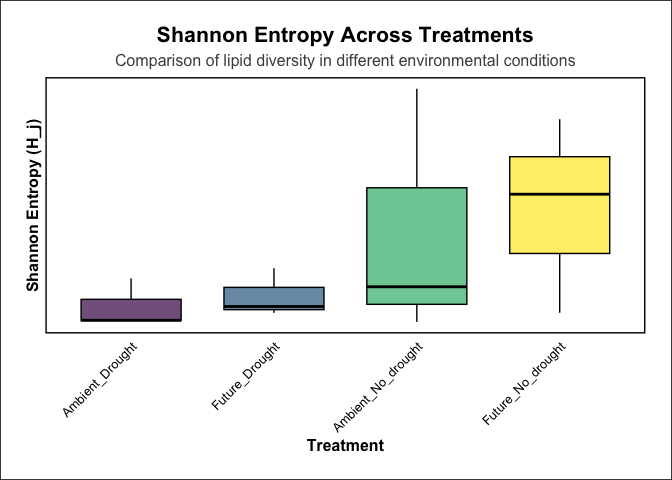

In [ ]:
# Calculate median H_j for each treatment
H_j_median <- H_j_with_treatment %>%
  group_by(Treatment) %>%
  summarize(median_H_j = median(H_j)) %>%
  arrange(median_H_j)

# Reorder the Treatment factor based on median H_j
H_j_with_treatment$Treatment <- factor(H_j_with_treatment$Treatment, 
                                       levels = H_j_median$Treatment)

# Create the enhanced plot
p <- ggplot(H_j_with_treatment, aes(x = Treatment, y = H_j, fill = Treatment)) +
  geom_boxplot(width = 0.7, color = "black", alpha = 0.7) +
  scale_fill_viridis(discrete = TRUE, option = "D") +
  theme_minimal(base_size = 12) +
  theme(
    legend.position = "none",
    axis.text.x = element_text(angle = 45, hjust = 1, vjust = 1),
    axis.text = element_text(color = "black"),
    axis.title = element_text(face = "bold"),
    panel.grid.major.x = element_blank(),
    panel.grid.minor = element_blank(),
    panel.border = element_rect(color = "black", fill = NA, size = 1),
    plot.title = element_text(hjust = 0.5, face = "bold", size = 16),
    plot.subtitle = element_text(hjust = 0.5, size = 12, color = "grey30"),
    plot.caption = element_text(hjust = 1, size = 10, color = "grey50"),
    plot.background = element_rect(fill = "white"),
    plot.margin = margin(t = 20, r = 20, b = 20, l = 20, unit = "pt")
  ) +
  labs(
    title = "Shannon Entropy Across Treatments",
    subtitle = "Comparison of lipid diversity in different environmental conditions",
    x = "Treatment",
    y = "Shannon Entropy (H_j)"
  ) +
  scale_y_continuous(breaks = seq(7.3, 7.8, by = 0.1), 
                     labels = sprintf("%.1f", seq(7.3, 7.8, by = 0.1)))

print(p)

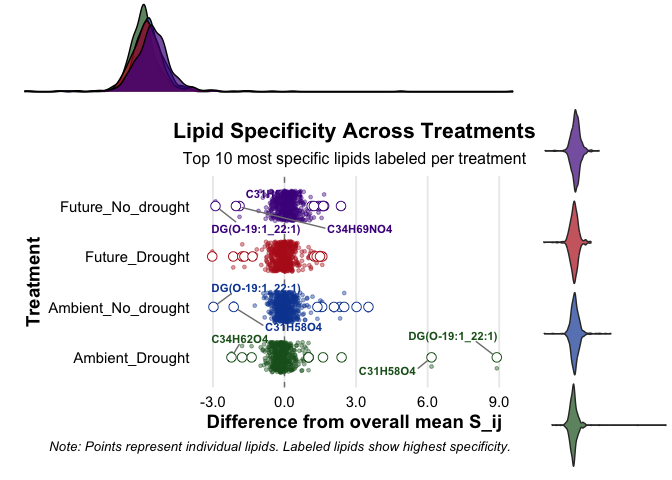

In [ ]:
# First, let's join the treatment information to S_ij
S_ij_with_treatment <- S_ij %>%
  left_join(sample_treatments, by = "Sample")

# Now, let's aggregate S_ij by treatment and lipid molecule
S_ij_by_treatment <- S_ij_with_treatment %>%
  group_by(Treatment, LipidMolecule) %>%
  summarize(mean_S_ij = mean(S_ij, na.rm = TRUE)) %>%
  ungroup()

# Calculate overall mean S_ij for each lipid molecule to order them
lipid_order <- S_ij_by_treatment %>%
  group_by(LipidMolecule) %>%
  summarize(overall_mean_S_ij = mean(mean_S_ij, na.rm = TRUE)) %>%
  arrange(desc(overall_mean_S_ij)) %>%
  pull(LipidMolecule)

# Select top 30 lipid molecules for better visibility
top_30_lipids <- lipid_order[1:30]
# Calculate mean S_ij across all treatments for each lipid
overall_mean <- S_ij_by_treatment %>%
  group_by(LipidMolecule) %>%
  summarize(overall_mean = mean(mean_S_ij, na.rm = TRUE))

# Calculate difference from overall mean for each lipid-treatment combination
S_ij_diff <- S_ij_by_treatment %>%
  left_join(overall_mean, by = "LipidMolecule") %>%
  mutate(difference = mean_S_ij - overall_mean)

# Find top 5 most specific lipids for each treatment
top_specific <- S_ij_diff %>%
  group_by(Treatment) %>%
  top_n(5, difference) %>%
  ungroup()

# Increase the number of top specific lipids to label for each treatment
n_top <- 10  # You can adjust this number as needed

top_specific <- S_ij_diff %>%
  group_by(Treatment) %>%
  top_n(n_top, abs(difference)) %>%
  ungroup()

# Create a custom color palette
custom_palette <- c("#1B5E20", "#0D47A1", "#B71C1C", "#4A148C")
#custom_palette <- c("#E69F00", "#56B4E9", "#009E73", "#F0E442")

# Create the main plot
main_plot <- ggplot(S_ij_diff, aes(x = difference, y = Treatment, color = Treatment)) +
  geom_vline(xintercept = 0, linetype = "dashed", color = "gray50") +
  geom_jitter(alpha = 0.4, height = 0.3, size = 1) +
  geom_point(data = top_specific, size = 3, shape = 21, fill = "white") +
  geom_text_repel(data = top_specific, 
                  aes(label = LipidMolecule), 
                  box.padding = 0.7, 
                  point.padding = 0.5,
                  force = 10,
                  segment.color = "grey50",
                  size = 3,
                  fontface = "bold") +
  scale_color_manual(values = custom_palette) +
  scale_x_continuous(labels = label_number(accuracy = 0.1)) +
  theme_minimal(base_size = 14) +
  theme(
    legend.position = "none",
    panel.grid.minor = element_blank(),
    panel.grid.major.y = element_blank(),
    axis.text = element_text(color = "black"),
    axis.title = element_text(face = "bold"),
    plot.title = element_text(face = "bold", size = 16, hjust = 0.5),
    plot.subtitle = element_text(size = 12, hjust = 0.5),
    plot.caption = element_text(size = 10, hjust = 1, face = "italic"),
    plot.background = element_rect(fill = "white", color = NA),
    plot.margin = margin(t = 20, r = 20, b = 20, l = 20)
  ) +
  labs(
    title = "Lipid Specificity Across Treatments",
    subtitle = paste("Top", n_top, "most specific lipids labeled per treatment"),
    x = "Difference from overall mean S_ij",
    y = "Treatment",
    caption = "Note: Points represent individual lipids. Labeled lipids show highest specificity."
  )

# Create density plots for the top and right sides
top_density <- ggplot(S_ij_diff, aes(x = difference, fill = Treatment)) +
  geom_density(alpha = 0.7) +
  scale_fill_manual(values = custom_palette) +
  theme_void() +
  theme(legend.position = "none")

right_density <- ggplot(S_ij_diff, aes(x = Treatment, y = difference, fill = Treatment)) +
  geom_violin(alpha = 0.7, scale = "width") +
  coord_flip() +
  scale_fill_manual(values = custom_palette) +
  theme_void() +
  theme(legend.position = "none")

# Combine the plots
combined_plot <- grid.arrange(
  top_density, NULL,
  main_plot, right_density,
  ncol = 2, nrow = 2,
  widths = c(4, 1), heights = c(1, 4)
)